<a href="https://colab.research.google.com/github/peter-callahan/vanderbilt/blob/main/week3_class_exercise_part1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 5262-51 Week 3 Exercise SOLUTION (Wed 5/25/2022)
# Author: Dana Zhang


# PART I: Understanding the Data

This part of the notebook demonstrates a subset of basic plots and techniques to perform an initial exploratory data analysis (EDA) using DS Python packages. You will also have an opportunity to apply some of the methods and functions introduced in the lecture videos from this week. 

## Problem Formulation

In this example, we will be using the planets sample dataset from seaborn: https://github.com/mwaskom/seaborn-data/blob/master/planets.csv

The dataset provides information on planets that astronomers have discovered around other stars, which are known as extrasolar planets, or exoplanets for short. We will first use data science Python packages to explore and understand the data. After that, we will build a model to predict method used to detect an exoplanet

In [ ]:
# tables and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

We have two options here: 1) load the raw data from its online repository into a pandas dataframe or 2) load the dataset from seaborn since it's one of the available examples in seaborn - it is auto-loaded as a pandas dataframe

**Data dictionary**
- method: how the planet was detected
- orbital period: how long (days) it takes to complete one cycle of rotation around its center (NaN values mean that an exoplanet is too far away from a star to detect where the orbit begins)
- mass: relative weight of the exoplanet
- distance: light-years from Earth (a light-year is a distance that it takes light a year to travel)
- year: discovery year

In [ ]:
# planets = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/planets.csv')
planets = sns.load_dataset('planets')

display(planets.tail(5))
planets.info()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


## Exploratory Data Analysis

In [ ]:
planets['number'].value_counts()

1    595
2    259
3     88
4     32
5     30
6     24
7      7
Name: number, dtype: int64

In [ ]:
planets.isna().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

([<matplotlib.patches.Wedge at 0x7fc6a77fb890>,
 [Text(-0.11830129205749786, 1.0936200456728684, 'Radial Velocity'),
  Text(-0.164654128432814, -1.0876070145001964, 'Transit'),
  Text(1.0128811168341587, -0.4290359462338647, 'Imaging'),
  Text(1.0745541084188555, -0.23523066993944275, 'Microlensing'),
  Text(1.0923015172455681, -0.12991303022803344, 'Eclipse Timing Variations'),
  Text(1.096834403394604, -0.08339239491706323, 'Pulsar Timing'),
  Text(1.0987030004255312, -0.05340146866833797, 'Transit Timing Variations'),
  Text(1.0995895635135577, -0.030046494172592007, 'Orbital Brightness Modulation'),
  Text(1.0999189206313742, -0.013355449715856666, 'Astrometry'),
  Text(1.0999949319911002, -0.0033391007613810027, 'Pulsation Timing Variations')])

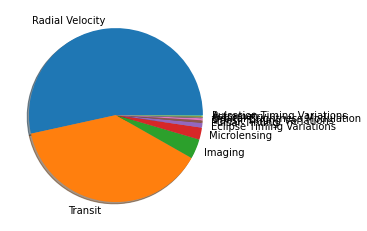

In [ ]:
# Creating a pie chart to visualize porportions of the detection methods in this data
methods_counts = planets['method'].value_counts()
display(methods_counts)

plt.pie(methods_counts, labels=methods_counts.index, shadow = True)

### Taking a pause: what do we notice from the pie chart and how might that affect our next step(s)?

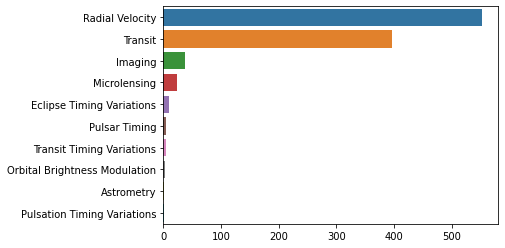

In [ ]:
# Alternatively, we can create a barplot to visualize the various methods available in the data
sns.barplot(y=methods_counts.index, x=methods_counts.values, orient='h')
# plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


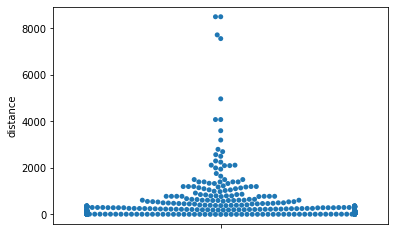

In [ ]:
# Visualizing distributions
sns.swarmplot(y='distance', data=planets) # s=1

In [ ]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


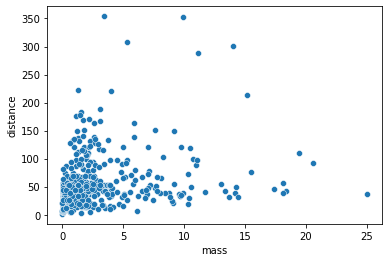

In [ ]:
# Examine relationships between variables
sns.scatterplot(x=planets['mass'], y=planets['distance'])

### Taking a pause: ideas for feature engineering on distance?

In [ ]:
# Use groupby to get an idea of the average distance each detection method is sensitive to.
planets.groupby('method')['distance'].mean()

method
Astrometry                         17.875000
Eclipse Timing Variations         315.360000
Imaging                            67.715937
Microlensing                     4144.000000
Orbital Brightness Modulation    1180.000000
Pulsar Timing                    1200.000000
Pulsation Timing Variations              NaN
Radial Velocity                    51.600208
Transit                           599.298080
Transit Timing Variations        1104.333333
Name: distance, dtype: float64

## Exercise

Begin the exercise with one member sharing their screen with this notebook open. Work through the questions with your team and discuss how some of the outputs may help inform the next steps in 

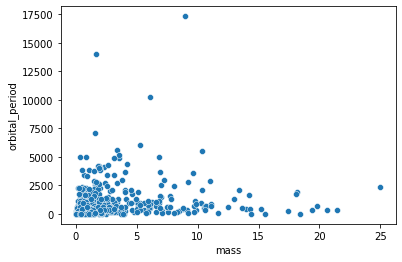

In [ ]:
# Question 1 - What is the relationship between mass and orbital periods? (Hint: use visualization to find out)
# TODO: Type your code below
sns.scatterplot(data=planets, x="mass", y="orbital_period")

In [ ]:
# Question 2 - What are top 2 most used methods for exoplanet detection?
planets['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [ ]:
# Question 3 - What was the earliest planet discovery by each of the available detection methods?
planets.groupby('method')['year'].min()

method
Astrometry                       2010
Eclipse Timing Variations        2008
Imaging                          2004
Microlensing                     2004
Orbital Brightness Modulation    2011
Pulsar Timing                    1992
Pulsation Timing Variations      2007
Radial Velocity                  1989
Transit                          2002
Transit Timing Variations        2011
Name: year, dtype: int64

In [ ]:
# Question 4 - How would you perform feature engineering on the method column? Print 5 sample rows to examine the engineered method column
# (Hint: use .apply())
keep_methods = ['Radial Velocity', 'Transit']
planets['method'] = planets['method'].apply(lambda x: x if x in keep_methods else 'Other')
planets.sample(5)

# TODO: Don't forget to drop the original method column if you created a new column


,method,number,orbital_period,mass,distance,year
966,Transit,1,8.158715,NaN,87.00,2010
564,Radial Velocity,1,24.348000,0.720,19.89,1999
906,Other,1,2780.000000,NaN,NaN,2011
16,Radial Velocity,1,4.230785,0.472,15.36,1995
538,Radial Velocity,2,406.600000,1.490,59.03,1999


Radial Velocity    553
Transit            397
Other               85
Name: method, dtype: int64

([<matplotlib.patches.Wedge at 0x7fc6a4880b10>,
 [Text(-0.11830129205749786, 1.0936200456728684, 'Radial Velocity'),
  Text(-0.164654128432814, -1.0876070145001964, 'Transit'),
  Text(1.063590916208937, -0.2806677091470164, 'Other')])

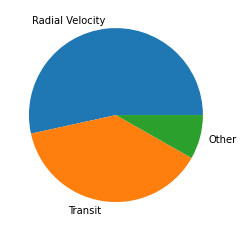

In [ ]:
# Question 5 - let's revisit the class distribution in our target variable, method (the one with three classes now)
# Draw a pie chart to visualize the target variable below
method_counts = planets['method'].value_counts()
display(method_counts)

plt.pie(method_counts, labels=method_counts.index)
# What's a potential problem here? (Note: we will not worry about this for now, but as you will soon see, the predictive model's performance reflects this problem!)
# Answer: our target class is quite imbalanced - 'Other' is the minority class with a much lower number of instances compared to the other two

In [ ]:
# Question 6 - there are a lot of missing values in the dataset, and one way to deal with that is to drop the rows with missing values
# TODO: Your code here
planets_dropped_missing = planets.dropna(axis=0)
# END OF TODO
print('# of rows of original dataframe: ', len(planets))
print('# of rows of new dataframe after dropping missing data: ', len(planets_dropped_missing))

# of rows of original dataframe:  1035
# of rows of new dataframe after dropping missing data:  498


In [ ]:
# Question 7 - pandas does have the fillna() method for filling missing data with values, as shown in the example code below. 
# What is the danger of using the fillna() method here? What should you do instead to impute missing values?
planets_filled = planets.copy()
planets_filled[['orbital_period', 'mass', 'distance']] = planets_filled[['orbital_period', 'mass', 'distance']].fillna(planets_filled[['orbital_period', 'mass', 'distance']].median())
planets_filled.describe()
# Answer: there is data leakage! Test set was not split before the imputation step, so information from the test data will now be available
# to the training model, which will likely impact model performance by introducing bias. In Part II below, we will use the pipelined approach to take care of data imputation

,number,orbital_period,mass,distance,year
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,1.785507,1921.365579,1.943088,218.270271,2009.070531
std,1.240976,25471.074254,2.774105,653.407624,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.747860,1.260000,38.010000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,487.100000,1.260000,130.720000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000
